In [246]:
#import modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from importlib import reload
plt=reload(plt)


In [247]:
#Read Data

#BN
bn_dist = pd.read_csv("BN_pairwises_dist.csv" ,sep="\t")
bn_dist.rename({'sample1':'BN_sample1','sample2':'BN_sample2','identity':'BN_identity','numSame':'BN_numAllelesSame','numCompared':'BN_numLociCompared'}, axis=1,inplace=True)

#Etoki
etoki_dist = pd.read_csv("etoki_pairwises_dist.csv", sep = "\t")
etoki_dist.rename({'fasta1':'Etoki_sample1','fasta2':'Etoki_sample2','dist':'Etoki_identity','numAllelesSame':'Etoki_numAllelesSame','numLociSame':'Etoki_numLociCompared'}, axis=1,inplace=True)

#hash-cgMLST
hash_dist = pd.read_csv("hash-cgmlst_distances_updated.csv", sep=",",skipinitialspace=True)
hash_dist = hash_dist.drop('total_loci', axis=1)
hash_dist['sample1'] = hash_dist['sample1'].str.replace('_crypto','')
hash_dist['sample2'] = hash_dist['sample2'].str.replace('_crypto','')

hash_dist.rename({'sample1':'hashcgmlst_sample1','sample2':'hashcgmlst_sample2','identity':'hashcgmlst_identity','num_alleles_same':'hashcgmlst_numAllelesSame','num_allele_compared':'hashcgmlst_numLociCompared'}, axis=1,inplace=True)


In [248]:
hash_dist.head()

,hashcgmlst_sample1,hashcgmlst_sample2,hashcgmlst_identity,hashcgmlst_numAllelesSame,hashcgmlst_numLociCompared
0,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,38783_Tag20_GTGGCC,0.297177,10,3365
1,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39011_Tag14_AGTTCC,0.297530,10,3361
2,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39609_ROE2901A7_CAGATC,0.298597,10,3349
3,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39722_ROE2901A4_TGACCA,0.297442,10,3362
4,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39898_ROE3112A2_CGCTCATT-ATAGAGGC,0.297619,10,3360


In [249]:
bn_dist['key'] = bn_dist[['BN_sample1','BN_sample2']].apply('-'.join,axis=1)
etoki_dist['key'] = etoki_dist[['Etoki_sample1','Etoki_sample2']].apply('-'.join, axis=1)
hash_dist['key'] = hash_dist[['hashcgmlst_sample1','hashcgmlst_sample2']].apply('-'.join, axis=1)

In [250]:
len(bn_dist), len(hash_dist), len(etoki_dist)

(18145, 18145, 18145)

In [251]:
merged_dfs = pd.merge(pd.merge(bn_dist,etoki_dist,on='key'),hash_dist,on='key')

In [252]:
# print(merged_dfs)
merged_dfs.head()

,BN_sample1,BN_sample2,BN_identity,BN_numAllelesSame,BN_numLociCompared,key,Etoki_sample1,Etoki_sample2,Etoki_identity,Etoki_numAllelesSame,Etoki_numLociCompared,hashcgmlst_sample1,hashcgmlst_sample2,hashcgmlst_identity,hashcgmlst_numAllelesSame,hashcgmlst_numLociCompared
0,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,38783_Tag20_GTGGCC,0.002990,10,3344,33541_ROE6964A8_CTCTCTAC-CTAAGCCT-38783_Tag20_...,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,38783_Tag20_GTGGCC,0.0,9,3382,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,38783_Tag20_GTGGCC,0.297177,10,3365
1,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39011_Tag14_AGTTCC,0.002971,10,3366,33541_ROE6964A8_CTCTCTAC-CTAAGCCT-39011_Tag14_...,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39011_Tag14_AGTTCC,0.0,9,3404,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39011_Tag14_AGTTCC,0.297530,10,3361
2,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39609_ROE2901A7_CAGATC,0.003277,10,3052,33541_ROE6964A8_CTCTCTAC-CTAAGCCT-39609_ROE290...,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39609_ROE2901A7_CAGATC,0.0,9,3094,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39609_ROE2901A7_CAGATC,0.298597,10,3349
3,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39722_ROE2901A4_TGACCA,0.002970,10,3367,33541_ROE6964A8_CTCTCTAC-CTAAGCCT-39722_ROE290...,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39722_ROE2901A4_TGACCA,0.0,9,3407,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39722_ROE2901A4_TGACCA,0.297442,10,3362
4,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39898_ROE3112A2_CGCTCATT-ATAGAGGC,0.002982,10,3353,33541_ROE6964A8_CTCTCTAC-CTAAGCCT-39898_ROE311...,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39898_ROE3112A2_CGCTCATT-ATAGAGGC,0.0,9,3391,33541_ROE6964A8_CTCTCTAC-CTAAGCCT,39898_ROE3112A2_CGCTCATT-ATAGAGGC,0.297619,10,3360


In [253]:
#filter data that has >75 of loci
min_loci = int(0.75*3642)
min_loci

2731

In [254]:
filtered_df = merged_dfs[(merged_dfs['BN_numLociCompared'] > min_loci) & (merged_dfs['Etoki_numLociCompared'] > min_loci) & (merged_dfs['hashcgmlst_numLociCompared'] > min_loci)]

In [255]:
len(filtered_df.BN_identity), len(filtered_df.Etoki_identity), len(filtered_df.hashcgmlst_identity)

(14940, 14940, 14940)

In [256]:
# # ax = plt.gca()
# fig=plt.figure()
# plt.scatter(filtered_df.BN_identity,filtered_df.Etoki_identity, color='red')
# # plt.scatter(filtered_df['BN_identity'],filtered_df['hashcgmlst_identity'], color = 'green')

# # plt.plot(filtered_df.BN_identity,filtered_df.Etoki_identity,)
# plt.xlabel('BN Identity')
# plt.ylabel('Etoki Identity')
# plt.show()

Rsquared : 0.9998942878647697
intercept: [-0.00317662]
slope: [[1.00385377]]


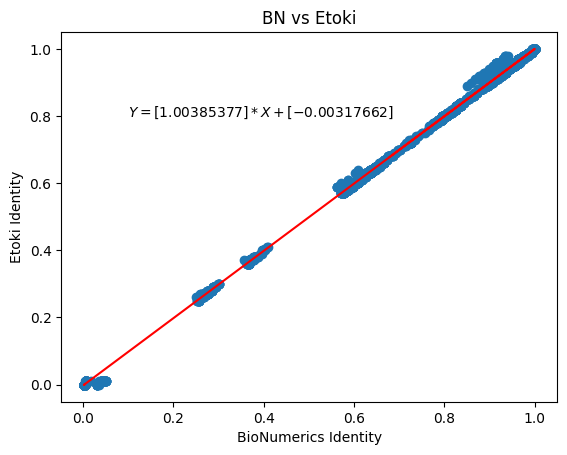

In [257]:
from sklearn.linear_model import LinearRegression

#BN vs Etoki
lm = LinearRegression()
X = filtered_df.BN_identity.values.reshape(-1,1)
Y = filtered_df.Etoki_identity.values.reshape(-1,1)
model = lm.fit(X, Y)
Y_pred = model.predict(X)
r_sq = model.score(X,Y)
lm_stats = (f"Rsquared : {r_sq}\n" f"intercept: {model.intercept_}\n" f"slope: {model.coef_}")
print(lm_stats)
y_pred =  model.intercept_ + model.coef_*X
# print(y_pred)

#https://stackoverflow.com/questions/66918745/linear-regression-equation-on-the-plot-python

#plotting
plt.scatter(X, Y)
plt.text(0.1,0.8,f'$Y = {model.coef_[0]} * X + {model.intercept_}$', fontsize = 10)
plt.plot(X, Y_pred, color='red')
plt.title('BN vs Etoki')
plt.xlabel("BioNumerics Identity")
plt.ylabel("Etoki Identity")
plt.show()

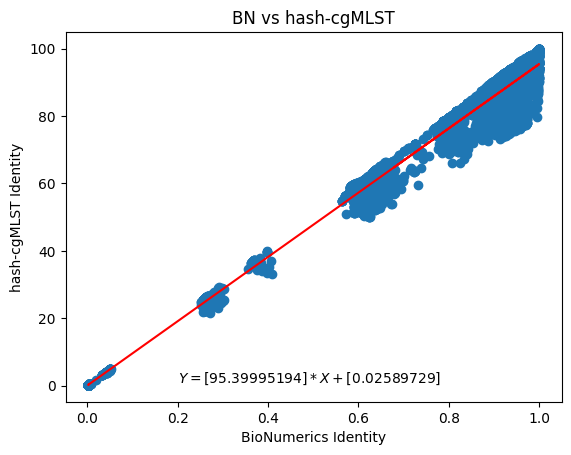

In [261]:
#BN vs hash
lm1 = LinearRegression()
X1 = filtered_df.BN_identity.values.reshape(-1,1)
Y1 = filtered_df.hashcgmlst_identity.values.reshape(-1,1)
hash_model = lm1.fit(X1, Y1)
Y_pred1 = hash_model.predict(X1)
hash_rsq = hash_model.score(X1,Y1)
hash_lm_stats = (f"Rsquared : {hash_rsq}\n" f"intercept: {hash_model.intercept_}\n" f"slope: {hash_model.coef_}")
hash_y_pred =  hash_model.intercept_ + hash_model.coef_*X



plt.scatter(X1, Y1)
plt.text(0.2,0.8, f'$Y = {hash_model.coef_[0]} * X + {hash_model.intercept_}$', fontsize = 10)
plt.plot(X1, Y_pred1, color='red')
plt.title('BN vs hash-cgMLST')
plt.xlabel("BioNumerics Identity")
plt.ylabel("hash-cgMLST Identity")
plt.show()